# set up

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# results="/home/c/dkorot/AI4GOOD/provided_dir/student/dkorot/results/few_shot/2025_11_10/few_shot_table_all_backbones.csv"
# results="/home/c/dkorot/AI4GOOD/ai4good-mushroom/results/few_shot_table_all_backbones.csv"
# df = pd.read_csv(results)
results = "/home/c/dkorot/AI4GOOD/ai4good-mushroom/results/few_shot_overall_results.json"
df = pd.read_json(results)



no_prompt_results_linear = {
"shots": [0, 1, 5, 10, 20],
"top1": [0.17375432304342256, 0.14794415268348918, 0.4118099141795824, 0.4759190470090944, 0.5701934161649801],
"top5": [0.3398872806455745, 0.3710772383758166, 0.7059049570897912, 0.7857051364160369, 0.8471884206481363],
"balanced_acc": [0.11135393210618887, 0.15693212241062424, 0.3783356767488163, 0.4684481591264947, 0.555312425235222],
"macro_f1": [0.08306181843795245, 0.1292491582531643, 0.3495973688573753, 0.42815230324569564, 0.5181250407800437]}

no_prompt_results_prompt = {
"shots": [0, 1, 5, 10, 20],
"top1": [0.17375432304342256, 0.12290252337645703, 0.3493019085436147, 0.3856154732931984, 0.46407070577686693],
"top5": [0.3398872806455745, 0.3021006788779301, 0.6398104265402843, 0.6893172793646727, 0.751953375176124],
"balanced_acc": [0.11135393210618887, 0.13618880148149493, 0.3103226373911458, 0.3750403797601285, 0.44167451571645827],
"macro_f1": [0.08306181843795245, 0.11428868692647248, 0.2876809967708631, 0.34099436563777863, 0.40388063876282854]}

no_prompt_results = {"prototype": no_prompt_results_prompt, "linear": no_prompt_results_linear}

In [5]:
df_no_tmp = df.drop(columns=["temp"])
df_condensed = (
    df_no_tmp.groupby(['shot', 'model', 'alpha', 'prompt_set', 'lr', 'weight_decay', 'mix_strategy', 'split', 'backbone'], as_index=False)
      .agg({'top1': "first", 'top5': "first", 'balanced_acc': "first", 'macro_f1': "first", 'per_class_acc': "first"})
)

In [ ]:
ideal_hyperparams = {
    "shots": 100,
    "model": "linear+prompts",
    "lr": 1e-4,
    "weight_decay": 0,
    "backbone": "PE-Core-bigG-14-448"}
# default alpha = 1.0
# additonal hyperparams:
# ideal_hyperparams.update({
#     "prompt_set": "v1",
#     "mix_strategy": "none"})



In [6]:
# loist to top 15 rows with the best macrof1 values and have the plit val with (df['split'] == "val")
best_models = df_condensed[df_condensed['split'] == "val"].sort_values(by='macro_f1', ascending=False).head(5)
best_models



shot           model  alpha prompt_set     lr  weight_decay  \
15246   100  linear+prompts    1.0   ensemble  0.003        0.0000   
15534   100  linear+prompts    1.0         v1  0.003        0.0000   
15258   100  linear+prompts    1.0   ensemble  0.003        0.0001   
15402   100  linear+prompts    1.0      names  0.003        0.0001   
15414   100  linear+prompts    1.0      names  0.003        0.0005   

      mix_strategy split             backbone      top1      top5  \
15246         none   val  PE-Core-bigG-14-448  0.892930  0.988986   
15534         none   val  PE-Core-bigG-14-448  0.893058  0.990074   
15258         none   val  PE-Core-bigG-14-448  0.891650  0.989050   
15402         none   val  PE-Core-bigG-14-448  0.891265  0.989562   
15414         none   val  PE-Core-bigG-14-448  0.890817  0.989306   

       balanced_acc  macro_f1  \
15246      0.894792  0.876843   
15534      0.893924  0.876744   
15258      0.892780  0.875693   
15402      0.893530  0.875065   
15414      0.891350  0.874263   

                                           per_class_acc  
15246  {'Agaricus augustus': 0.9, 'Agaricus xanthoder...  
15534  {'Agaricus augustus': 0.9, 'Agaricus xanthoder...  
15258  {'Agaricus augustus': 0.9, 'Agaricus xanthoder...  
15402  {'Agaricus augustus': 0.92, 'Agaricus xanthode...  
15414  {'Agaricus augustus': 0.92, 'Agaricus xanthode...

In [11]:
import pandas as pd

# df = your dataframe
# Example: df = pd.read_csv("results.csv") or loaded from JSON

best_alpha_per_class = {}
i=0
for cls in set().union(*df["per_class_acc"].apply(lambda d: d.keys())):
    i+=1; print(i)
    # Filter rows where this class is present (should be all)
    sub = df.copy()

    # Extract accuracy of this class for each row
    sub["acc_cls"] = sub["per_class_acc"].apply(lambda d: d.get(cls, float("nan")))

    # ------- Best per-class accuracy -------
    idx_best_acc = sub["acc_cls"].idxmax()
    best_alpha_acc = sub.loc[idx_best_acc, "alpha"]
    best_value_acc = sub.loc[idx_best_acc, "acc_cls"]

    # ------- Best macro-F1 (using overall macro_f1 column) -------
    # idx_best_f1 = sub["macro_f1"].idxmax()
    # best_alpha_f1 = sub.loc[idx_best_f1, "alpha"]
    # best_value_f1 = sub.loc[idx_best_f1, "macro_f1"]

    # Store
    best_alpha_per_class[cls] = best_alpha_acc
    # records.append({
    #     "class_name": cls,
    #     "best_alpha_per_class_acc": best_alpha_acc,
    #     "best_value_per_class_acc": best_value_acc,
    #     # "best_alpha_macro_f1": best_alpha_f1,
    #     # "best_macro_f1_value": best_value_f1
    # })

# Final table
# result_df = pd.DataFrame(best_alpha_per_class)

print(best_alpha_per_class)
# export tp json
import json
with open("best_alpha_per_class.json", "w") as f:
    json.dump(best_alpha_per_class, f)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
{'Agaricus augustus': np.float64(0.8), 'Chlorophyllum brunneum': np.float64(1.0), 'Fomitopsis pinicola': np.float64(0.4), 'Psilocybe cyanescens': np.float64(0.2), 'Boletus reticulatus': np.float64(0.2), 'Gyromitra gigas': np.float64(0.6000000000000001), 'Graphis scripta': np.float64(0.4), 'Platismatia glauca': np.float64(0.0), 'Stereum ostrea': np.float64(0.0), 'Suillus americanus': np.float64(0.2), 'Gyromitra infula': np.float6

In [13]:
# Keys that define a unique configuration *except* temperature
group_keys = [
    "shot", "model", "alpha", "prompt_set",
    "lr", "weight_decay", "mix_strategy",
    "split", "backbone"
]

metric_cols = ["top1", "top5", "balanced_acc", "macro_f1"]

changed_any = False

print("\nChecking all configurations for temperature effects...\n")

for cfg, group in df.groupby(group_keys):
    # If only one temp value, skip
    if group["temp"].nunique() <= 1:
        continue
    
    # Compare metrics across temps
    metrics_across_temps = group[metric_cols].drop_duplicates()

    if len(metrics_across_temps) > 1:
        changed_any = True
        print("\n⚠️ Temperature *affects* results for config:\n")
        for k, v in zip(group_keys, cfg):
            print(f"  {k}: {v}")
        print("\nDifferent outputs:")
        print(metrics_across_temps)
        print("-" * 60)

if not changed_any:
    print("✅ Temperature does NOT affect any results across all configurations!")


Checking all configurations for temperature effects...


⚠️ Temperature *affects* results for config:

  shot: 1
  model: linear+prompts
  alpha: 0.0
  prompt_set: ensemble
  lr: 0.0005
  weight_decay: 0.0005
  mix_strategy: none
  split: val
  backbone: ViT-B-16

Different outputs:
           top1      top5  balanced_acc  macro_f1
77868  0.078829  0.183658      0.037712  0.020127
77872  0.078829  0.183658      0.037712  0.020127
------------------------------------------------------------

⚠️ Temperature *affects* results for config:

  shot: 1
  model: linear+prompts
  alpha: 0.0
  prompt_set: names
  lr: 0.001
  weight_decay: 0.0005
  mix_strategy: none
  split: val
  backbone: ViT-H-14-378-quickgelu

Different outputs:
           top1      top5  balanced_acc  macro_f1
32874  0.318327  0.611168       0.23119  0.170583
32878  0.318327  0.611104       0.23119  0.170583
------------------------------------------------------------

⚠️ Temperature *affects* results for config:

  shot: 

In [ ]:
# Collapse rows that differ only by `temp` when metrics are similar
def collapse_temp_rows(df, group_keys, metric_cols, time_col='time', time_agg='min', rtol=1e-3, atol=1e-6):
    """Return a new DataFrame where rows that differ only by `temp`
    are collapsed when metric values are similar.
    - group_keys: list of keys used to identify unique configs (include 'temp' originally)
    - metric_cols: list of metric column names to compare
    - time_col: column name containing runtime/time to aggregate
    - time_agg: 'min'|'mean'|'median' to aggregate time
    - rtol/atol: tolerances for np.isclose comparison
    """
    key_list = [k for k in group_keys if k != 'temp' and k != time_col]
    out = []
    collapsed = 0
    for _, grp in df.groupby(key_list):
        # If there's only one temp, just keep the rows
        if grp['temp'].nunique() <= 1:
            out.extend(grp.to_dict(orient='records'))
            continue
        # Compare metric rows to their mean across temps
        arr = grp[metric_cols].to_numpy(dtype=float)
        mean = arr.mean(axis=0)
        close = np.all(np.isclose(arr, mean, rtol=rtol, atol=atol), axis=1)
        if close.all():
            # collapse: take first row as template and aggregate fields
            row = grp.iloc[0].copy()
            row['temp'] = ','.join(map(str, sorted(grp['temp'].unique())))
            if time_col in grp.columns:
                if time_agg == 'min':
                    row[time_col] = float(grp[time_col].min())
                elif time_agg == 'mean':
                    row[time_col] = float(grp[time_col].mean())
                else:
                    row[time_col] = float(grp[time_col].median())
            out.append(row.to_dict())
            collapsed += len(grp) - 1
        else:
            # keep all rows if metrics vary across temps
            out.extend(grp.to_dict(orient='records'))
    print(f'Collapsed {collapsed} rows into their temperature-equivalent representatives')
    return pd.DataFrame(out)

# Example usage: adjust rtol/atol to control how similar metrics must be to collapse
collapsed_df = collapse_temp_rows(df, group_keys, metric_cols, time_col='time', time_agg='min', rtol=1e-3)
print('Original rows:', len(df), '-> After collapse:', len(collapsed_df))
# To replace `df` for downstream plotting uncomment the next line:
# df = collapsed_df

In [ ]:
# combo_cols = [
#     "model", "alpha", "temp", "prompt_set", "lr", "weight_decay", "mix_strategy", "backbone", "shot"
# ]

# res = []

# for idx, row in df.iterrows():
#     print(f"Processing row {idx+1}/{len(df)}")
#     per_class = row["per_class_acc"]
#     combo = tuple(row[c] for c in combo_cols)
    
#     for cls, acc in per_class.items():
#         res.append({
#             "class": cls,
#             "accuracy": acc,
#             **{c: row[c] for c in combo_cols}
#         })

# long_df = pd.DataFrame(res)

# idx = long_df.groupby("class")["accuracy"].idxmax()
# best_per_class = long_df.loc[idx].reset_index(drop=True)

# for _, r in best_per_class.iterrows():
#     print(f"Class: {r['class']}")
#     print(f"  Highest accuracy: {r['accuracy']:.4f}")
#     print("  Best combination:")
#     for c in combo_cols:
#         print(f"    {c}: {r[c]}")
#     print("-" * 60)


Processing row 1/93324
Processing row 2/93324
Processing row 3/93324
Processing row 4/93324
Processing row 5/93324
Processing row 6/93324
Processing row 7/93324
Processing row 8/93324
Processing row 9/93324
Processing row 10/93324
Processing row 11/93324
Processing row 12/93324
Processing row 13/93324
Processing row 14/93324
Processing row 15/93324
Processing row 16/93324
Processing row 17/93324
Processing row 18/93324
Processing row 19/93324
Processing row 20/93324
Processing row 21/93324
Processing row 22/93324
Processing row 23/93324
Processing row 24/93324
Processing row 25/93324
Processing row 26/93324
Processing row 27/93324
Processing row 28/93324
Processing row 29/93324
Processing row 30/93324
Processing row 31/93324
Processing row 32/93324
Processing row 33/93324
Processing row 34/93324
Processing row 35/93324
Processing row 36/93324
Processing row 37/93324
Processing row 38/93324
Processing row 39/93324
Processing row 40/93324
Processing row 41/93324
Processing row 42/93324
P

In [ ]:
# row = df[
#     (df["model"] == "linear+prompts") &
#     (df["alpha"] == 0.2) &
#     (df["temp"] == 1) &
#     (df["prompt_set"] == "ensemble") &
#     (df["lr"] == 0.0001) &
#     (df["weight_decay"] == 0.0005) &
#     (df["mix_strategy"] == "none") &
#     (df["split"] == "val") &
#     (df["backbone"] == "PE-Core-bigG-14-448")
# ]

# print(row)


       shot           model  alpha  temp prompt_set      lr  weight_decay  \
170       1  linear+prompts    0.2     1   ensemble  0.0001        0.0005   
2762      5  linear+prompts    0.2     1   ensemble  0.0001        0.0005   
5378     10  linear+prompts    0.2     1   ensemble  0.0001        0.0005   
8006     20  linear+prompts    0.2     1   ensemble  0.0001        0.0005   
10526    50  linear+prompts    0.2     1   ensemble  0.0001        0.0005   
13154   100  linear+prompts    0.2     1   ensemble  0.0001        0.0005   

      mix_strategy split             backbone      top1      top5  \
170           none   val  PE-Core-bigG-14-448  0.175909  0.559426   
2762          none   val  PE-Core-bigG-14-448  0.346952  0.742636   
5378          none   val  PE-Core-bigG-14-448  0.428407  0.838179   
8006          none   val  PE-Core-bigG-14-448  0.572362  0.896260   
10526         none   val  PE-Core-bigG-14-448  0.629290  0.906250   
13154         none   val  PE-Core-bigG-14-448 

In [ ]:
# freqs = {}

# for col in combo_cols:    freqs[col] = best_per_class[col].value_counts()

# for col in combo_cols:
#     print(f"\n=== Frequency for {col} ===")
#     print(freqs[col].to_string())



=== Frequency for model ===
model
linear+prompts    162
zero-shot           7

=== Frequency for alpha ===
alpha
0.2    47
0.0    37
0.4    32
0.6    19
0.8    17
1.0    17

=== Frequency for temp ===
temp
1    162
0      7

=== Frequency for prompt_set ===
prompt_set
ensemble    88
v1          37
names       37
none         7

=== Frequency for lr ===
lr
0.0001    108
0.0005     25
0.0010     17
0.0030     12
0.0000      7

=== Frequency for weight_decay ===
weight_decay
0.0005    61
0.0000    58
0.0001    50

=== Frequency for mix_strategy ===
mix_strategy
none    169

=== Frequency for backbone ===
backbone
PE-Core-bigG-14-448        119
ViT-gopt-16-SigLIP2-384     26
ViT-H-14-378-quickgelu      23
ViT-B-16                     1

=== Frequency for shot ===
shot
1      72
5      40
10     24
100    20
0       7
20      3
50      3


In [ ]:
# # {splits:
# #       {backbones:
# #             {shots: 
# #                   {models:
# #                        {accuracy_types: value}}}}
# splits = ['val', 'test']
# backbones = ['PE-Core-bigG-14', 'ViT-B-32', 'ViT-B-16', 'ViT-L-14', 'ViT-gopt-16', 'ViT-H-14']
# shots = [0, 1, 5, 10, 20, 50, 100]
# models = ['prototype', 'linear']  # model types
# accuracy_types = ['top1', 'top5', 'balanced_acc', 'macro_f1']  # accuracy metrics

# results_dict = {}

# for split in splits:
#     print(split)
#     results_dict[split] = {}
#     for acc_type in accuracy_types:
#         results_dict[split][acc_type] = {}
#         print("     "+ str(acc_type))
#         for shot in shots:
#             print("         " + str(shot))
#             results_dict[split][acc_type][shot]= {}
#             for backbone in backbones:
#                 print("             " + str(backbone))
#                 results_dict[split][acc_type][shot][backbone] = {}
#                 for model in models:
#                     print("                     " + str(model))
#                     results_dict[split][acc_type][shot][backbone][model] = {}
                    
#                     # rows = df[
#                     #     (df["split"] == split) &
#                     #     (df['backbone'].str.contains(backbone)) &
#                     #     (df["shot"] == shot) &
#                     #     df["model"].str.startswith(model) | (df["model"] == "zero-shot")
#                     # ]
#                     rows = df[
#                                 (df["split"] == split) &
#                                 (df['backbone'].str.contains(backbone)) &
#                                 (df["shot"] == shot) &
#                                 (
#                                     (df["model"].str.startswith(model)) |
#                                     (df["model"] == "zero-shot")
#                                 )
#                             ]

#                     idx = rows[acc_type].idxmax()
#                     best_row = rows.loc[idx]
#                     print(f"                            best alpha: {best_row['alpha']}, best {acc_type}: {best_row[acc_type]}")
#                     results_dict[split][acc_type][shot][backbone][model] = {
#                         "best_alpha": float(best_row["alpha"]),
#                         "best_value": float(best_row[acc_type]),
#                     }

# # print(results_dict)

# import json

# with open('best_alphas.json', 'w') as f:
#     json.dump(results_dict, f)



val
     top1
         0
             PE-Core-bigG-14
                     prototype
                            best alpha: 0.0, best top1: 0.5354123975409836
                     linear
                            best alpha: 0.0, best top1: 0.5354123975409836
             ViT-B-32
                     prototype
                            best alpha: 0.0, best top1: 0.2131147540983606
                     linear
                            best alpha: 0.0, best top1: 0.2131147540983606
             ViT-B-16
                     prototype
                            best alpha: 0.0, best top1: 0.1634861680327868
                     linear
                            best alpha: 0.0, best top1: 0.1634861680327868
             ViT-L-14
                     prototype
                            best alpha: 0.0, best top1: 0.2396900614754098
                     linear
                            best alpha: 0.0, best top1: 0.2396900614754098
             ViT-gopt-16
                   

In [ ]:
# # {splits:
# #       {backbones:
# #             {shots: 
# #                   {models:
# #                        {accuracy_types: value}}}}
# splits = ['val', 'test']
# backbones = ['PE-Core-bigG-14', 'ViT-B-32', 'ViT-B-16', 'ViT-L-14', 'ViT-gopt-16', 'ViT-H-14']
# shots = [0, 1, 5, 10, 20, 50, 100]
# models = ['prototype+', 'linear+']  # model types
# accuracy_types = ['top1', 'top5', 'balanced_acc', 'macro_f1']  # accuracy metrics

# results_dict_op = {}

# for split in splits:
#     print(split)
#     results_dict_op[split] = {}
#     for acc_type in accuracy_types:
#         results_dict_op[split][acc_type] = {}
#         print("     "+ str(acc_type))
#         for shot in shots:
#             print("         " + str(shot))
#             results_dict_op[split][acc_type][shot]= {}
            
#             rows = df[(df["split"] == split) & (df["shot"] == shot)]

#             idx = rows[acc_type].idxmax()
#             best_row = rows.loc[idx]

#             print(f"             best backbone: {best_row['backbone']}, best model: {best_row['model']}")

#             print(f"                    best alpha: {best_row['alpha']}, best {acc_type}: {best_row[acc_type]}")
#             results_dict_op[split][acc_type][shot] = {
#                 "best_backbone": best_row['backbone'],
#                 "best_model": best_row['model'],
#                 "best_alpha": float(best_row["alpha"]),
#                 "best_value": float(best_row[acc_type]),
#             }


val
     top1
         0
             best backbone: PE-Core-bigG-14-448, best model: zero-shot
                    best alpha: 0.0, best top1: 0.5354123975409836
         1
             best backbone: PE-Core-bigG-14-448, best model: prototype+prompts(alpha=0.20)
                    best alpha: 0.2, best top1: 0.6111680327868853
         5
             best backbone: PE-Core-bigG-14-448, best model: prototype+prompts(alpha=0.40)
                    best alpha: 0.4, best top1: 0.7288678278688525
         10
             best backbone: PE-Core-bigG-14-448, best model: prototype+prompts(alpha=0.60)
                    best alpha: 0.6, best top1: 0.7688268442622951
         20
             best backbone: PE-Core-bigG-14-448, best model: linear+prompts(alpha=0.80)
                    best alpha: 0.8, best top1: 0.7966828893442623
         50
             best backbone: PE-Core-bigG-14-448, best model: linear+prompts(alpha=0.80)
                    best alpha: 0.8, best top1: 0.842853483606

In [1]:

# # Example lists for looping
# backbones = ['PE-Core-bigG-14', 'ViT-B-32', 'ViT-B-16', 'ViT-L-14', 'ViT-gopt-16', 'ViT-H-14']
# splits = ['val', 'test']
# models = ['prototype', 'linear']  # model types
# accuracy_types = ['top1', 'top5', 'balanced_acc', 'macro_f1']  # accuracy metrics

               
# for split in splits:
#     for backbone in backbones:
#         for model in models:
#             for accuracy_type in accuracy_types:
#                 # Filter dataframe
#                 plot_df = df[
#                     (df['split'] == split) &
#                     (df['model'].str.contains(model, regex=False)) &
#                     (df['backbone'].str.contains(backbone))
#                 ]
#                 if plot_df.empty:
#                     continue  # skip if no data for this config

#                 print(plot_df)

#                 # Plot
#                 plt.figure(figsize=(10,6))
#                 sns.lineplot(
#                     data=plot_df,
#                     x='shot',
#                     y=accuracy_type,
#                     hue='alpha',
#                     markers=True,
#                     dashes=False,
#                     palette="viridis"
#                 )

#                 # plot baseline
#                 zeroShot_value = df.loc[(df["model"] == "zero-shot") & (df["split"] == split) & (df["backbone"].str.contains(backbone, case=False, na=False)), accuracy_type].values
#                 # plt.plot([0], [zeroShot_value], marker='x', linestyle='--', color='red', label='zero_shot with prompt')
#                 plt.plot(no_prompt_results[model]["shots"], no_prompt_results[model][accuracy_type], marker='x', linestyle='--', color='black', label='baseline B-32 no-prompt')

#                 plt.xscale('log')
#                 plt.xlim(-5, 105)

#                 plt.title(f"{backbone} {model}: {accuracy_type} Accuracy vs Shots ({split})")
#                 plt.ylabel(f"{accuracy_type} Accuracy")
#                 plt.xlabel("Shots")
#                 plt.legend(title="Alpha", bbox_to_anchor=(1.05, 1), loc='upper left')
#                 plt.tight_layout()
#                 plt.show()



# plot

     shot                          model  alpha split             backbone  \
2       1                      prototype    1.0   val  PE-Core-bigG-14-448   
4       1  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
6       1  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
8       1  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
10      1  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
12      1  prototype+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
14      1  prototype+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
30      5                      prototype    1.0   val  PE-Core-bigG-14-448   
32      5  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
34      5  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
36      5  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
38      5  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-b

/tmp/ipykernel_923482/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


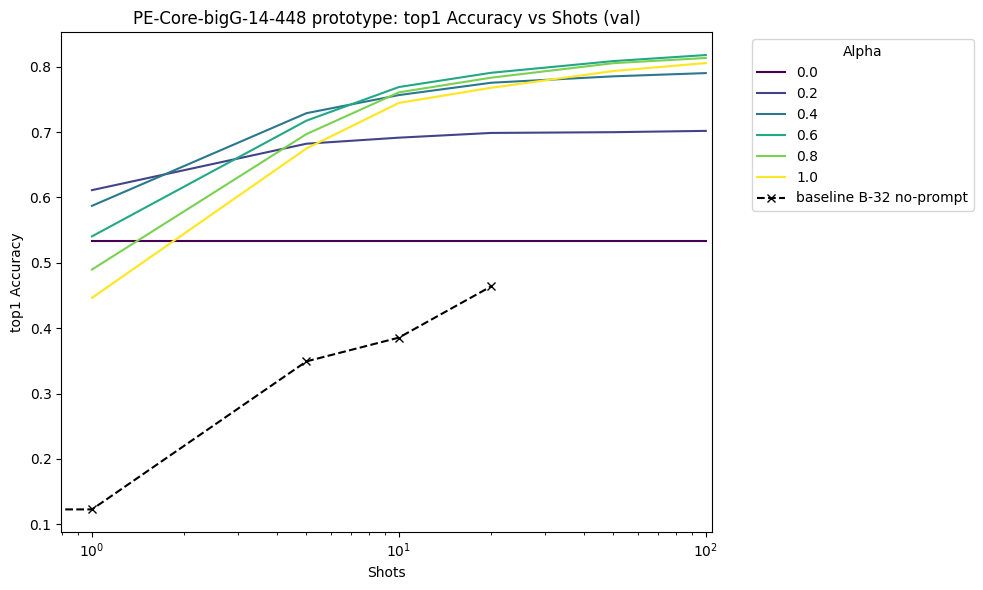

     shot                          model  alpha split             backbone  \
2       1                      prototype    1.0   val  PE-Core-bigG-14-448   
4       1  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
6       1  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
8       1  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
10      1  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
12      1  prototype+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
14      1  prototype+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
30      5                      prototype    1.0   val  PE-Core-bigG-14-448   
32      5  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
34      5  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
36      5  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
38      5  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-b

/tmp/ipykernel_923482/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


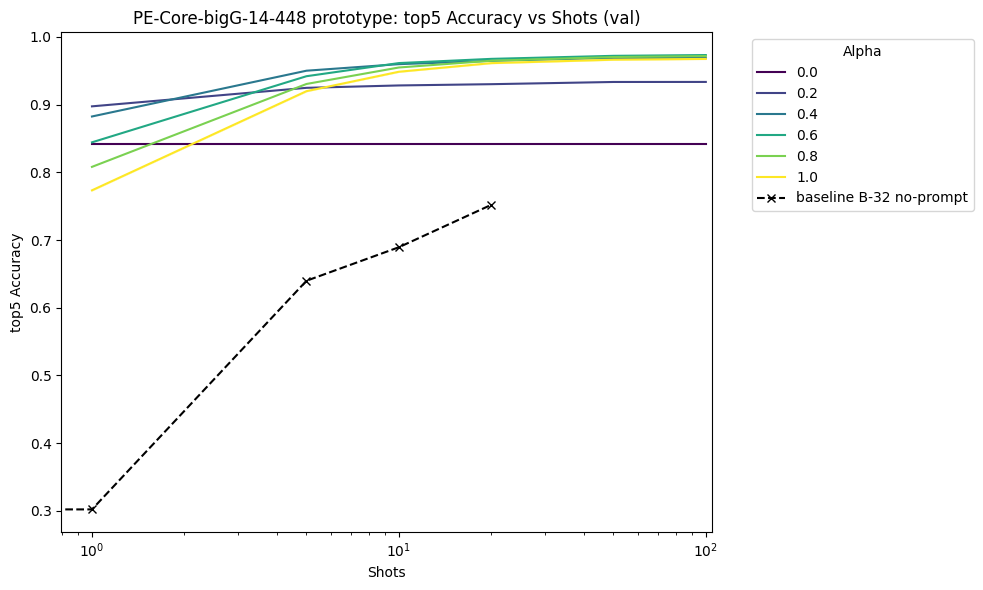

     shot                          model  alpha split             backbone  \
2       1                      prototype    1.0   val  PE-Core-bigG-14-448   
4       1  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
6       1  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
8       1  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
10      1  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
12      1  prototype+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
14      1  prototype+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
30      5                      prototype    1.0   val  PE-Core-bigG-14-448   
32      5  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
34      5  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
36      5  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
38      5  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-b

/tmp/ipykernel_923482/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


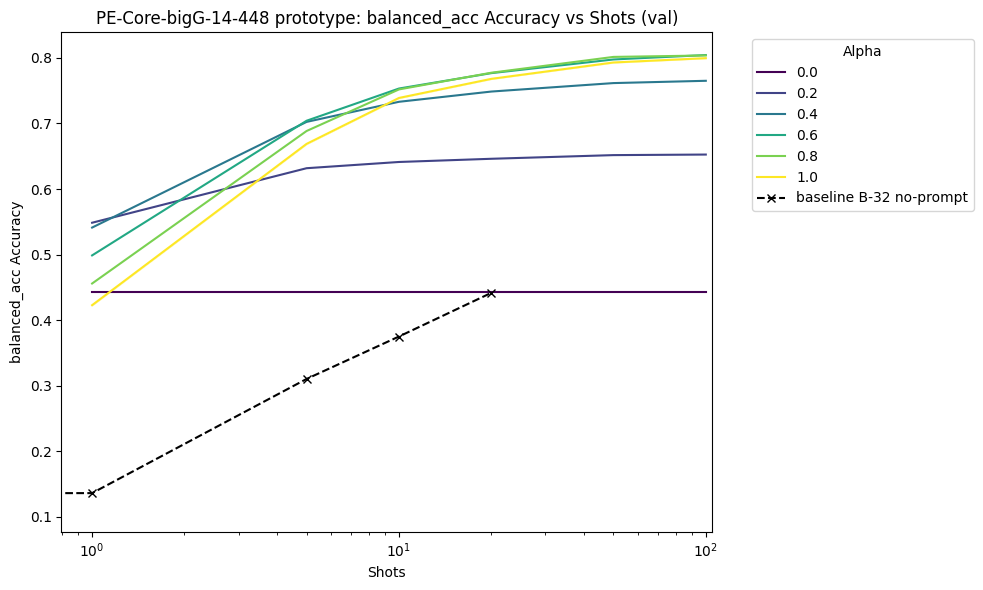

     shot                          model  alpha split             backbone  \
2       1                      prototype    1.0   val  PE-Core-bigG-14-448   
4       1  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
6       1  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
8       1  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
10      1  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
12      1  prototype+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
14      1  prototype+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
30      5                      prototype    1.0   val  PE-Core-bigG-14-448   
32      5  prototype+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
34      5  prototype+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
36      5  prototype+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
38      5  prototype+prompts(alpha=0.60)    0.6   val  PE-Core-b

/tmp/ipykernel_923482/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


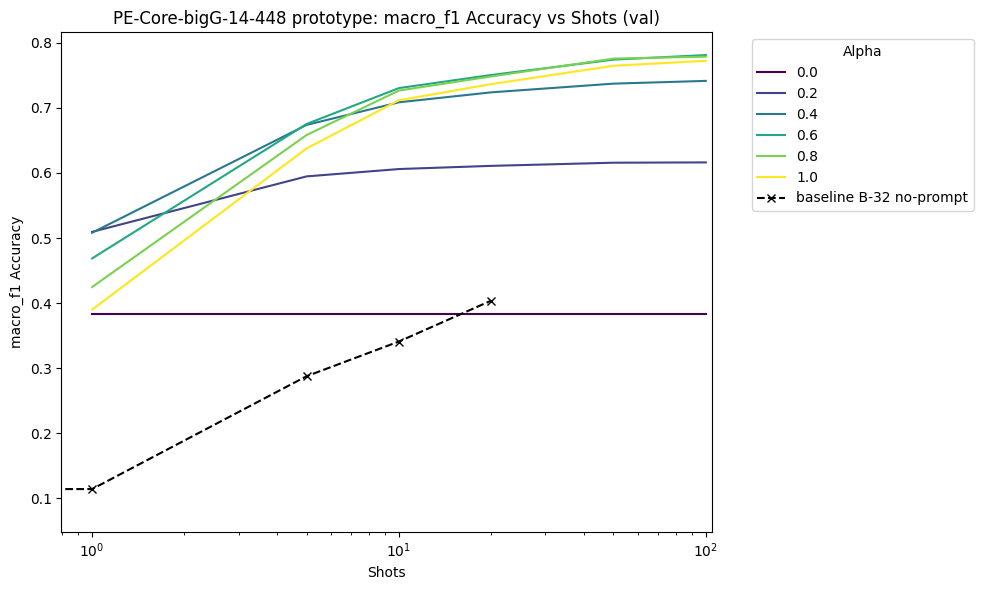

     shot                       model  alpha split             backbone  \
16      1                      linear    1.0   val  PE-Core-bigG-14-448   
18      1  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
20      1  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
22      1  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
24      1  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
26      1  linear+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
28      1  linear+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
44      5                      linear    1.0   val  PE-Core-bigG-14-448   
46      5  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
48      5  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
50      5  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
52      5  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
54      5  linear+prompts

/tmp/ipykernel_923482/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


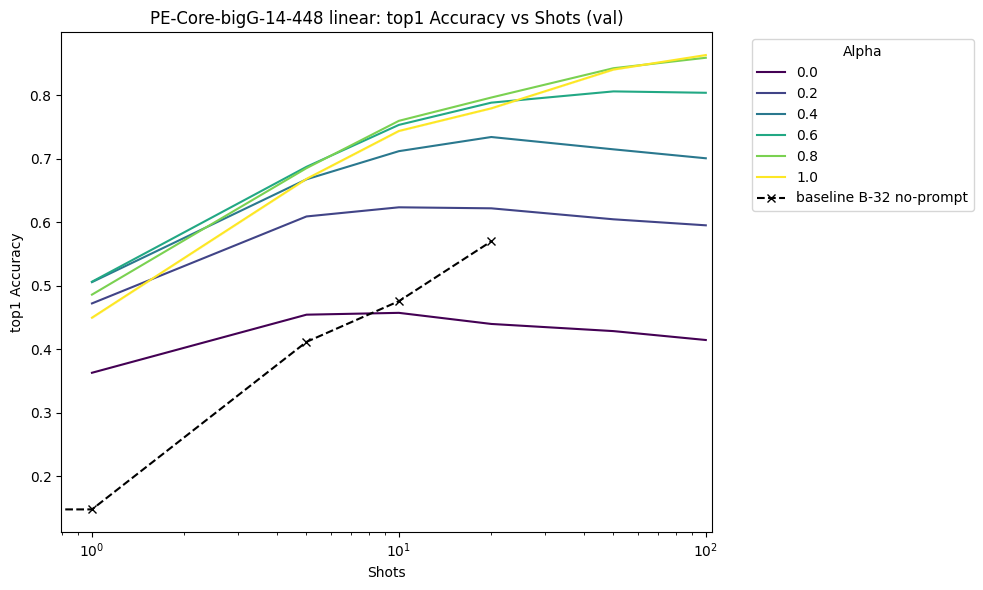

     shot                       model  alpha split             backbone  \
16      1                      linear    1.0   val  PE-Core-bigG-14-448   
18      1  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
20      1  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
22      1  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
24      1  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
26      1  linear+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
28      1  linear+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
44      5                      linear    1.0   val  PE-Core-bigG-14-448   
46      5  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
48      5  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
50      5  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
52      5  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
54      5  linear+prompts

/tmp/ipykernel_923482/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


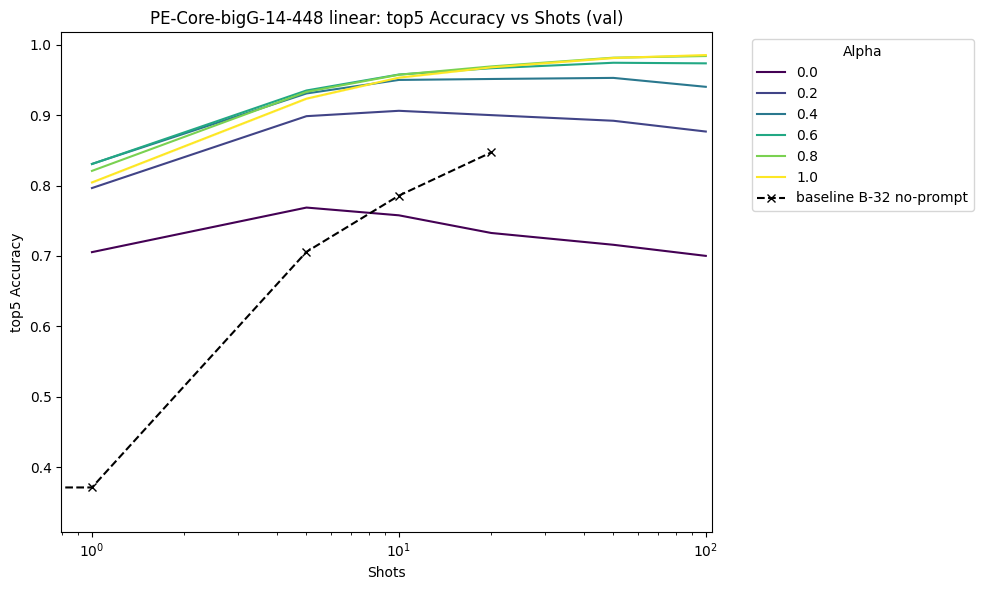

     shot                       model  alpha split             backbone  \
16      1                      linear    1.0   val  PE-Core-bigG-14-448   
18      1  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
20      1  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
22      1  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
24      1  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
26      1  linear+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
28      1  linear+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
44      5                      linear    1.0   val  PE-Core-bigG-14-448   
46      5  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
48      5  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
50      5  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
52      5  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
54      5  linear+prompts

/tmp/ipykernel_923482/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


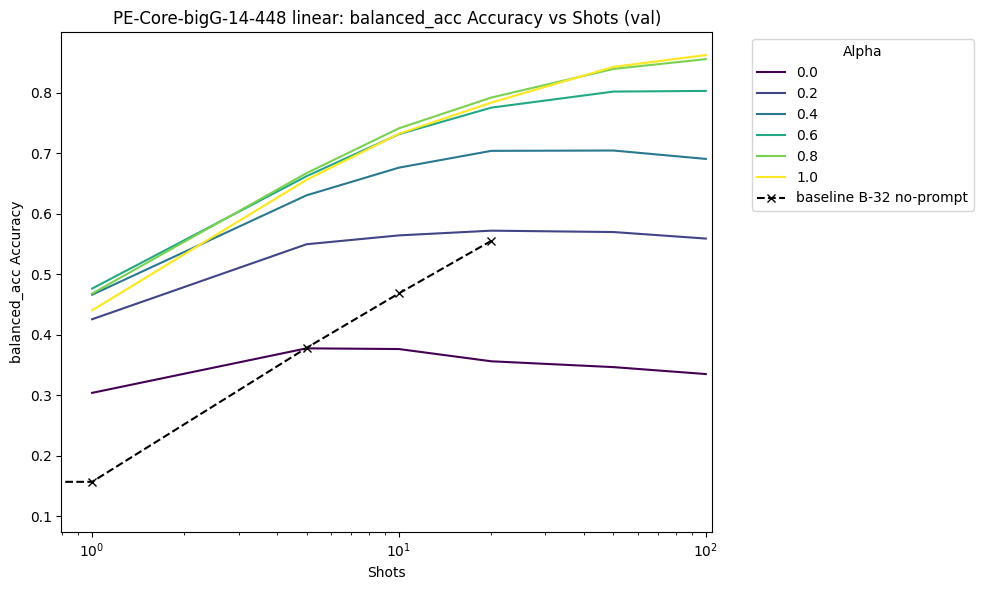

     shot                       model  alpha split             backbone  \
16      1                      linear    1.0   val  PE-Core-bigG-14-448   
18      1  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
20      1  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
22      1  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
24      1  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
26      1  linear+prompts(alpha=0.80)    0.8   val  PE-Core-bigG-14-448   
28      1  linear+prompts(alpha=1.00)    1.0   val  PE-Core-bigG-14-448   
44      5                      linear    1.0   val  PE-Core-bigG-14-448   
46      5  linear+prompts(alpha=0.00)    0.0   val  PE-Core-bigG-14-448   
48      5  linear+prompts(alpha=0.20)    0.2   val  PE-Core-bigG-14-448   
50      5  linear+prompts(alpha=0.40)    0.4   val  PE-Core-bigG-14-448   
52      5  linear+prompts(alpha=0.60)    0.6   val  PE-Core-bigG-14-448   
54      5  linear+prompts

/tmp/ipykernel_923482/1971709229.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-5, 105)


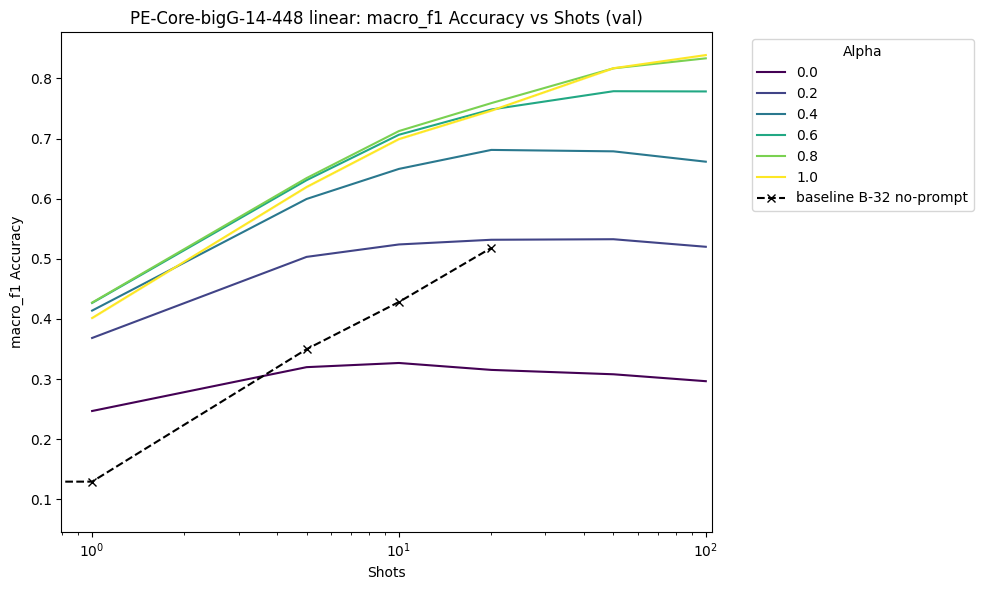

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example lists for looping
splits = ['val'] #, 'test']
models = ['prototype', 'linear']  # model types
backbones = ['PE-Core-bigG-14-448']# ['ViT-B-32', 'ViT-B-16', 'ViT-L-14', 'ViT-gopt-16', 'ViT-H-14']
accuracy_types = ['top1', 'top5', 'balanced_acc', 'macro_f1']  # accuracy metrics

               
for split in splits:
    for backbone in backbones:
        for model in models:
            for accuracy_type in accuracy_types:
                # Filter dataframe
                plot_df = df[
                    (df['split'] == split) &
                    (df['model'].str.contains(model, regex=False)) &
                    (df['backbone'].str.contains(backbone))
                ]
                if plot_df.empty:
                    continue  # skip if no data for this config

                print(plot_df)

                # Plot
                plt.figure(figsize=(10,6))
                sns.lineplot(
                    data=plot_df,
                    x='shot',
                    y=accuracy_type,
                    hue='alpha',
                    markers=True,
                    dashes=False,
                    palette="viridis"
                )

                # plot baseline
                zeroShot_value = df.loc[(df["model"] == "zero-shot") & (df["split"] == split) & (df["backbone"].str.contains(backbone, case=False, na=False)), accuracy_type].values
                # plt.plot([0], [zeroShot_value], marker='x', linestyle='--', color='red', label='zero_shot with prompt')
                plt.plot(no_prompt_results[model]["shots"], no_prompt_results[model][accuracy_type], marker='x', linestyle='--', color='black', label='baseline B-32 no-prompt')

                plt.xscale('log')
                plt.xlim(-5, 105)

                plt.title(f"{backbone} {model}: {accuracy_type} Accuracy vs Shots ({split})")
                plt.ylabel(f"{accuracy_type} Accuracy")
                plt.xlabel("Shots")
                plt.legend(title="Alpha", bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()

